In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
for i in df.columns:
    mean_value = df[i].mean()
    df[i].fillna(mean_value,inplace=True)

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
from sklearn.model_selection import train_test_split
X = df.loc[:,df.columns != 'MEDV']
Y = df.loc[:,df.columns == 'MEDV']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [9]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13,), activation = 'relu', name = 'dense_1'))
model.add(Dense(64, activation = 'relu', name = 'dense_2'))
model.add(Dense(1, activation = 'linear', name = 'dense_output'))

model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(X_train,Y_train,epochs = 100, validation_split=0.05, verbose = 2)

Epoch 1/100
11/11 - 1s - loss: 577.9052 - mae: 22.1451 - val_loss: 589.5593 - val_mae: 22.2857 - 896ms/epoch - 81ms/step
Epoch 2/100
11/11 - 0s - loss: 525.9824 - mae: 20.8743 - val_loss: 522.6743 - val_mae: 20.6725 - 50ms/epoch - 5ms/step
Epoch 3/100
11/11 - 0s - loss: 445.7455 - mae: 18.7443 - val_loss: 418.9284 - val_mae: 17.8704 - 52ms/epoch - 5ms/step
Epoch 4/100
11/11 - 0s - loss: 331.2436 - mae: 15.3609 - val_loss: 285.0226 - val_mae: 13.6373 - 48ms/epoch - 4ms/step
Epoch 5/100
11/11 - 0s - loss: 210.6559 - mae: 11.3917 - val_loss: 168.6035 - val_mae: 9.1222 - 48ms/epoch - 4ms/step
Epoch 6/100
11/11 - 0s - loss: 139.0720 - mae: 9.0576 - val_loss: 127.3819 - val_mae: 7.9279 - 48ms/epoch - 4ms/step
Epoch 7/100
11/11 - 0s - loss: 125.0187 - mae: 8.5497 - val_loss: 115.3323 - val_mae: 7.5712 - 68ms/epoch - 6ms/step
Epoch 8/100
11/11 - 0s - loss: 106.6326 - mae: 7.7373 - val_loss: 106.6678 - val_mae: 7.0895 - 57ms/epoch - 5ms/step
Epoch 9/100
11/11 - 0s - loss: 92.7434 - mae: 6.9959 

Epoch 72/100
11/11 - 0s - loss: 15.3329 - mae: 2.5670 - val_loss: 24.7516 - val_mae: 3.2020 - 48ms/epoch - 4ms/step
Epoch 73/100
11/11 - 0s - loss: 15.2569 - mae: 2.6748 - val_loss: 24.8744 - val_mae: 3.1916 - 60ms/epoch - 5ms/step
Epoch 74/100
11/11 - 0s - loss: 15.1076 - mae: 2.5863 - val_loss: 24.7208 - val_mae: 3.1842 - 70ms/epoch - 6ms/step
Epoch 75/100
11/11 - 0s - loss: 14.9072 - mae: 2.5638 - val_loss: 24.3253 - val_mae: 3.1495 - 57ms/epoch - 5ms/step
Epoch 76/100
11/11 - 0s - loss: 14.9789 - mae: 2.5929 - val_loss: 23.1990 - val_mae: 3.1003 - 47ms/epoch - 4ms/step
Epoch 77/100
11/11 - 0s - loss: 14.8798 - mae: 2.5552 - val_loss: 23.6906 - val_mae: 3.0893 - 59ms/epoch - 5ms/step
Epoch 78/100
11/11 - 0s - loss: 14.7123 - mae: 2.5593 - val_loss: 23.3901 - val_mae: 3.0631 - 49ms/epoch - 4ms/step
Epoch 79/100
11/11 - 0s - loss: 14.5833 - mae: 2.5400 - val_loss: 21.5648 - val_mae: 3.0044 - 56ms/epoch - 5ms/step
Epoch 80/100
11/11 - 0s - loss: 14.6528 - mae: 2.6376 - val_loss: 23.819

In [13]:
mse_nn , mae_nn = model.evaluate(X_test,Y_test)

print('MSE ',mse_nn)
print('MAE ',mae_nn)

5/5 [==============================] - 0s 2ms/step - loss: 23.4057 - mae: 3.1154
MSE  23.405742645263672
MAE  3.115429639816284


In [14]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [15]:
y_pred

array([[12.789989 ],
       [26.765066 ],
       [42.40183  ],
       [15.260214 ],
       [28.346966 ],
       [44.058987 ],
       [24.982145 ],
       [11.501317 ],
       [15.074075 ],
       [30.645472 ],
       [24.914377 ],
       [20.095522 ],
       [13.652958 ],
       [29.147606 ],
       [16.569262 ],
       [19.923088 ],
       [19.137989 ],
       [40.333508 ],
       [17.567976 ],
       [13.741423 ],
       [12.935125 ],
       [22.40293  ],
       [34.00745  ],
       [41.912037 ],
       [33.322147 ],
       [23.079962 ],
       [15.303337 ],
       [20.370401 ],
       [21.3952   ],
       [14.752144 ],
       [24.710436 ],
       [33.632458 ],
       [12.430939 ],
       [19.666546 ],
       [22.129297 ],
       [35.685375 ],
       [27.118666 ],
       [16.579855 ],
       [14.723381 ],
       [33.785984 ],
       [30.73835  ],
       [18.196585 ],
       [17.300043 ],
       [44.53496  ],
       [13.314993 ],
       [25.399134 ],
       [19.401287 ],
       [23.19

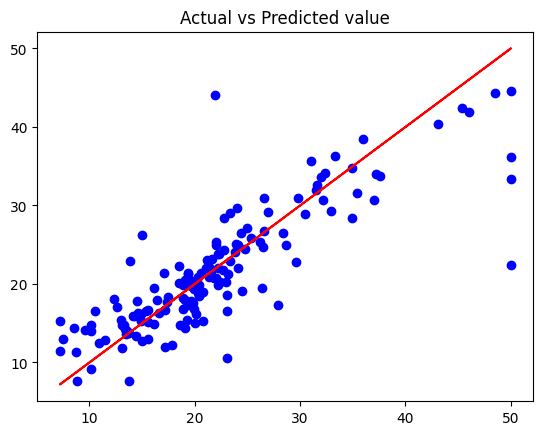

In [16]:
import matplotlib.pyplot as plt

plt.scatter(Y_test,y_pred,color = 'blue')
plt.plot(Y_test,Y_test,color='red')
plt.title('Actual vs Predicted value')
plt.show()

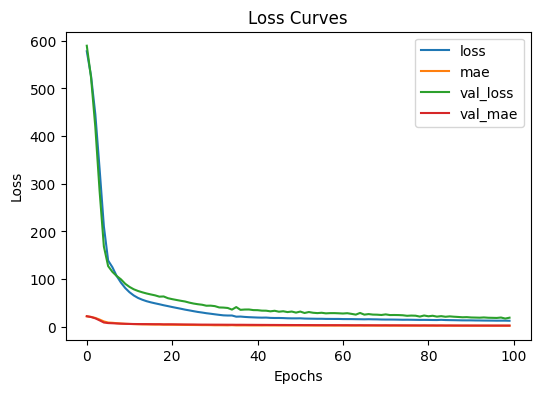

In [17]:
pd.DataFrame(history.history).plot(figsize =(6,4),xlabel = 'Epochs', ylabel = 'Loss', title = 'Loss Curves')
plt.show()